In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('./data/preprocess_all_v1.csv')

In [3]:
len(df.columns)

68

In [4]:
df.head(10)

,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,...,revol_bal_log,collections_12_mths_ex_med_flag,delinq_2yrs_flag,revol_util_log,emp_length,fico,credit_hist_months,have_bc,have_rev,treasury
0,0.0,8.0,OK,11.608245,8.702178,70.374384,0,0,1,34.70,...,9.735660,0,1,4.058717,10+ years,672.0,278,1,1,1.071500
1,0.0,5.0,TX,11.082158,10.919099,6.566836,0,0,0,17.74,...,8.264106,0,0,2.014903,unknown,822.0,401,1,1,1.682857
2,0.0,3.0,FL,10.819798,7.815207,73.376344,0,0,0,6.99,...,8.828348,0,0,3.939638,5 years,702.0,226,1,1,1.483636
3,0.0,6.0,IL,11.002117,6.891626,91.072727,0,0,0,28.94,...,9.718783,0,0,4.127134,10+ years,677.0,190,1,1,1.013333
4,0.0,5.0,NC,11.487854,9.901736,69.192901,0,0,0,10.31,...,10.710811,0,0,4.050044,5 years,737.0,206,1,1,2.187727
5,0.0,8.0,IN,11.082158,8.600983,68.942857,0,0,0,17.69,...,9.717760,0,0,4.158883,5 years,662.0,99,1,1,0.989000
6,0.0,6.0,CT,11.264477,10.510287,0.029973,0,0,0,6.58,...,4.727388,0,0,0.832909,5 years,762.0,92,1,1,2.681579
7,0.0,6.0,MN,10.819798,8.854665,4.041096,0,0,0,9.70,...,6.542472,0,0,2.054124,10+ years,677.0,162,1,1,2.935909
8,0.0,9.0,CO,10.463132,9.211140,48.422680,0,0,0,22.81,...,9.150484,0,0,3.815512,3 years,682.0,40,1,1,1.479000
9,0.0,2.0,NJ,11.156265,6.270988,97.688596,0,0,0,30.29,...,10.249592,0,0,4.518522,10+ years,662.0,169,1,1,1.050952


In [5]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: acc_now_delinq
1: acc_open_past_24mths
2: addr_state
3: annual_inc
4: bc_open_to_buy
5: bc_util
6: chargeoff_within_12_mths
7: collections_12_mths_ex_med
8: delinq_2yrs
9: dti
10: grade
11: home_ownership
12: id
13: inq_last_6mths
14: installment
15: int_rate
16: issue_d
17: loan_amnt
18: loan_status
19: loan_status_label
20: mo_sin_old_il_acct
21: mo_sin_old_rev_tl_op
22: mo_sin_rcnt_rev_tl_op
23: mo_sin_rcnt_tl
24: mort_acc
25: mths_since_last_delinq
26: mths_since_last_major_derog
27: mths_since_last_record
28: mths_since_rcnt_il
29: mths_since_recent_bc
30: mths_since_recent_bc_dlq
31: mths_since_recent_inq
32: mths_since_recent_revol_delinq
33: num_accts_ever_120_pd
34: num_actv_bc_tl
35: num_actv_rev_tl
36: num_bc_sats
37: num_bc_tl
38: num_il_tl
39: num_op_rev_tl
40: num_rev_accts
41: num_tl_120dpd_2m
42: num_tl_30dpd
43: num_tl_90g_dpd_24m
44: num_tl_op_past_12m
45: open_acc
46: pct_tl_nvr_dlq
47: pub_rec
48: pub_rec_bankruptcies
49: purpose
50: revol_bal
51: revol_util
52: 

In [6]:
with open('./data/selected_cols_v1.txt', 'r', encoding='utf-8') as f:
    selected_cols_v1 = [line.strip() for line in f if line.strip()]

In [7]:
df_sel = df[selected_cols_v1]
df_sel = pd.concat([df_sel, df['int_rate'], df['treasury'], df['loan_status']], axis = 1)

In [9]:
df_sel.head(10)

,mo_sin_old_rev_tl_op,open_acc,num_tl_30dpd,mo_sin_rcnt_tl,acc_open_past_24mths,mort_acc,collections_12_mths_ex_med,tot_hi_cred_lim,total_rev_hi_lim,num_rev_accts,...,annual_inc,pub_rec_bankruptcies,num_op_rev_tl,num_tl_120dpd_2m,tax_liens,chargeoff_within_12_mths,num_tl_90g_dpd_24m,int_rate,treasury,loan_status
0,5.631212,3.258097,0,2.079442,8.0,2.0,0,13.386136,10.317483,3.178054,...,11.608245,0,2.639057,0,0,0,0,24.99,1.071500,1
1,5.996452,2.995732,0,2.079442,5.0,3.0,0,12.186589,11.157707,2.995732,...,11.082158,0,2.833213,0,0,0,0,7.07,1.682857,1
2,4.882802,2.197225,0,1.945910,3.0,1.0,0,12.263582,9.532569,2.079442,...,10.819798,1,1.791759,0,0,0,0,10.42,1.483636,0
3,5.257495,3.044522,0,2.397895,6.0,1.0,0,12.137617,10.229260,3.332205,...,11.002117,0,2.772589,0,0,0,0,9.99,1.013333,0
4,5.337538,2.484907,0,1.945910,5.0,3.0,0,12.911647,11.302229,3.091042,...,11.487854,0,2.397895,0,0,0,0,17.97,2.187727,1
5,4.615121,3.091042,0,2.197225,8.0,2.0,0,11.972816,10.196232,3.135494,...,11.082158,0,2.995732,0,0,0,0,19.99,0.989000,1
6,4.510860,2.639057,0,1.609438,6.0,0.0,0,10.949086,10.701040,2.484907,...,11.264477,0,2.397895,0,0,0,0,10.33,2.681579,1
7,4.912655,2.397895,0,1.609438,6.0,3.0,0,9.980541,9.392829,2.484907,...,10.819798,1,2.197225,0,0,0,0,8.46,2.935909,0
8,3.465736,2.484907,0,2.302585,9.0,0.0,0,10.792243,9.985160,2.564949,...,10.463132,0,2.397895,0,0,0,0,17.99,1.479000,0
9,5.141664,2.564949,0,3.178054,2.0,0.0,0,11.324256,10.357806,2.772589,...,11.156265,0,2.397895,0,1,0,0,18.24,1.050952,0


In [10]:
with open('./data/categorical_cols_v1.txt', 'r', encoding='utf-8') as f:
    cat_columns_v1 = [line.strip() for line in f if line.strip() != '']

In [11]:
df_cat = df[cat_columns_v1]
df_cat.head()

,addr_state,inq_last_6mths,emp_length,home_ownership,purpose,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,verification_status,grade
0,OK,1,10+ years,MORTGAGE,debt_consolidation,<1yr,unknown,unknown,<1yr,<1yr,<1yr,0,<1yr,Verified,E
1,TX,0,unknown,MORTGAGE,home_improvement,unknown,unknown,unknown,1-2yr,<1yr,unknown,10+,unknown,Not Verified,A
2,FL,0,5 years,MORTGAGE,home_improvement,unknown,unknown,<3yr,2yr+,1-2yr,unknown,6,unknown,Not Verified,B
3,IL,0,10+ years,MORTGAGE,credit_card,3-4yr,4-5yr,unknown,unknown,1-2yr,3-4yr,5,3-4yr,Source Verified,B
4,NC,1,5 years,MORTGAGE,debt_consolidation,unknown,unknown,unknown,1-2yr,1-2yr,unknown,6,unknown,Verified,D


In [12]:
# 범주형 변수들 -> 원핫인코딩
# columns=cat_columns_v1 (리스트 그대로 전달)
df_cat = pd.get_dummies(df_cat, drop_first=True)

# 원본 컬럼 제거: 이미 get_dummies에서 제거되므로, 보통 이 라인은 필요 없음
# 하지만 혹시 모르니 아래처럼, 변수명을 일치시키세요.
df_cat = df_cat.drop(cat_columns_v1, axis=1, errors='ignore')

In [13]:
df_cat.head()

,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,...,mths_since_recent_revol_delinq_<1yr,mths_since_recent_revol_delinq_unknown,verification_status_Source Verified,verification_status_Verified,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False


In [14]:
df_sel = pd.concat([df_sel, df_cat], axis = 1)

In [15]:
# 범주형 변수가 남아있는 게 있는지 확인
obj_cols = df_sel.select_dtypes(include='object').columns
print(obj_cols)

Index([], dtype='object')


In [16]:
# 우수사례 예시와 같이 모델1의 목적함수는 loan_status 예측하기
X = df_sel.drop('loan_status', axis=1)
y = df_sel['loan_status']

In [18]:
X.head(10)

,mo_sin_old_rev_tl_op,open_acc,num_tl_30dpd,mo_sin_rcnt_tl,acc_open_past_24mths,mort_acc,collections_12_mths_ex_med,tot_hi_cred_lim,total_rev_hi_lim,num_rev_accts,...,mths_since_recent_revol_delinq_<1yr,mths_since_recent_revol_delinq_unknown,verification_status_Source Verified,verification_status_Verified,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,5.631212,3.258097,0,2.079442,8.0,2.0,0,13.386136,10.317483,3.178054,...,True,False,False,True,False,False,False,True,False,False
1,5.996452,2.995732,0,2.079442,5.0,3.0,0,12.186589,11.157707,2.995732,...,False,True,False,False,False,False,False,False,False,False
2,4.882802,2.197225,0,1.945910,3.0,1.0,0,12.263582,9.532569,2.079442,...,False,True,False,False,True,False,False,False,False,False
3,5.257495,3.044522,0,2.397895,6.0,1.0,0,12.137617,10.229260,3.332205,...,False,False,True,False,True,False,False,False,False,False
4,5.337538,2.484907,0,1.945910,5.0,3.0,0,12.911647,11.302229,3.091042,...,False,True,False,True,False,False,True,False,False,False
5,4.615121,3.091042,0,2.197225,8.0,2.0,0,11.972816,10.196232,3.135494,...,False,False,False,True,False,False,True,False,False,False
6,4.510860,2.639057,0,1.609438,6.0,0.0,0,10.949086,10.701040,2.484907,...,False,True,True,False,True,False,False,False,False,False
7,4.912655,2.397895,0,1.609438,6.0,3.0,0,9.980541,9.392829,2.484907,...,False,True,True,False,False,False,False,False,False,False
8,3.465736,2.484907,0,2.302585,9.0,0.0,0,10.792243,9.985160,2.564949,...,False,True,True,False,False,False,True,False,False,False
9,5.141664,2.564949,0,3.178054,2.0,0.0,0,11.324256,10.357806,2.772589,...,False,True,False,False,False,False,True,False,False,False


In [18]:
# 3대 1로 train set, validation set 나누기
X_tr,X_val,y_tr,y_val=train_test_split(X,y, test_size=0.25, random_state=111)

In [19]:
# train data에 대한 선형 회귀분석
lpm = LinearRegression()
lpm.fit(X_tr,y_tr)

LinearRegression()

In [20]:
# 계수를 편하게 보기 위해 데이터프레임으로 바꿈
coeff = pd.DataFrame(lpm.coef_, index=X_tr.columns, columns=["coefficient"])
coeff.head(15)

,coefficient
mo_sin_old_rev_tl_op,-0.024858
open_acc,-0.010833
num_tl_30dpd,0.019767
mo_sin_rcnt_tl,-0.007960
acc_open_past_24mths,0.007917
mort_acc,-0.005330
collections_12_mths_ex_med,0.016022
tot_hi_cred_lim,-0.009655
total_rev_hi_lim,-0.001578
num_rev_accts,0.000324


In [21]:
print(coeff.sort_values('coefficient', ascending=False).head(10))

                        coefficient
grade_G                    0.118890
purpose_small_business     0.093303
grade_F                    0.091302
grade_E                    0.075933
purpose_educational        0.070032
emp_length_unknown         0.056576
grade_D                    0.050492
addr_state_AR              0.041220
addr_state_LA              0.034874
addr_state_MS              0.032967


In [22]:
# 모델 불러오고, fit하고 예측하는 순서대로 진행됨
y_val_pred=lpm.predict(X_val)
y_val_pred

array([0.15331864, 0.15415155, 0.33471845, ..., 0.11755561, 0.01693998,
       0.35918595], shape=(268850,))

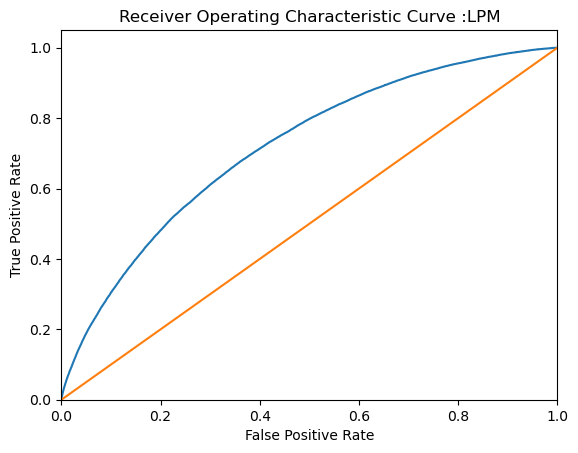

In [23]:
# roc_curve로 하이퍼파라미터 정해보기
from sklearn.metrics import confusion_matrix, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve :LPM')

plt.show()

In [24]:
roc_auc = auc(fpr,tpr)
roc_auc

np.float64(0.7169227690055905)

In [25]:
# j_score - 단순하게 true positive rate와 false positive rate 간 거리가 가장 먼 값을 hyperparameter로 지정
# 여기서 optimal threshold는 오직 부도 예측에만 관한 것
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.4f}")

Optimal threshold: 0.2074


In [ ]:
# sharpe ratio 계산
# 무위험 이자율을 treasury 컬럼에서 가져오기
X_tr['risk_free'] = X_tr['treasury']
X_val['risk_free'] = X_val['treasury']

lpm = LinearRegression()
lpm.fit(X_tr.drop(columns='risk_free'), y_tr) 

val_pred_prob = lpm.predict(X_val.drop(columns='risk_free'))

thresholds = np.linspace(0.01, 0.99, 100)
sharpe_ratios = []

for t in thresholds:
    val_binary = np.where(val_pred_prob > t, 1, 0) 
    val_return = []

    for pred, actual, r, rf in zip(val_binary, y_val, X_val['int_rate'], X_val['risk_free']):
        if pred == 0:  # 승인
            if actual == 1: # 실제로는 부도
                val_return.append(0)
            else:  # 실제로 상환 
                val_return.append(r)
        else: # 부도난다고 예측한 경우
            val_return.append(rf)

    val_return = np.array(val_return)
    risk_free = np.array(X_val['risk_free'])
    excess_ret = val_return - risk_free
    sharpe = excess_ret.mean() / excess_ret.std()
    sharpe_ratios.append(sharpe)


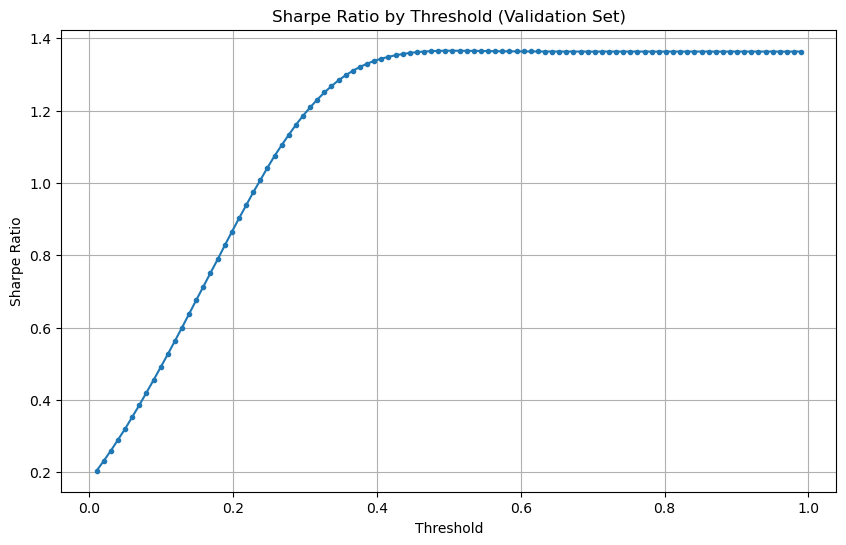

 Optimal Threshold: 0.505
 Max Sharpe Ratio: 1.3652


In [28]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, sharpe_ratios, marker='o', markersize=3)
plt.xlabel("Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio by Threshold (Validation Set)")
plt.grid(True)
plt.show()

optimal_idx = np.nanargmax(sharpe_ratios)
optimal_threshold = thresholds[optimal_idx]
print(f" Optimal Threshold: {optimal_threshold:.3f}")
print(f" Max Sharpe Ratio: {sharpe_ratios[optimal_idx]:.4f}")


Max Sharpe Ratio: 1.3652, at threshold=0.505


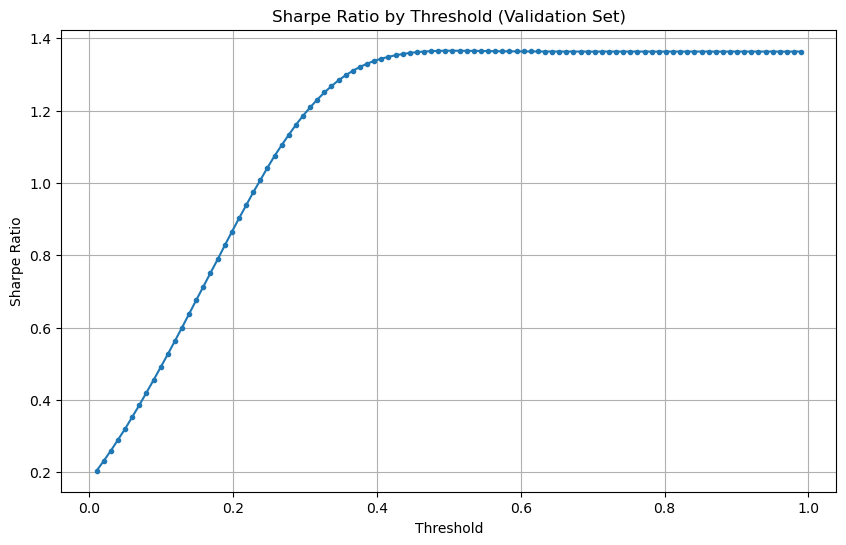

 Optimal Threshold: 0.505
 Max Sharpe Ratio: 1.3652


In [29]:
# 준비
n_sample = len(X_val)
n_thresholds = len(thresholds)
val_pred_prob = lpm.predict(X_val.drop(columns='risk_free'))
thresholds = np.linspace(0.01, 0.99, 100)

# 2D array로 변환
val_pred_matrix = val_pred_prob.reshape(-1, 1)
val_binary_mat = (val_pred_matrix > thresholds.reshape(1, -1)).astype(int)  # shape (n_sample, n_thresholds)

# (n_sample, 1) -> (n_sample, n_thresholds)로 확장
y_val_mat = np.array(y_val).reshape(-1, 1)
int_rate_mat = np.array(X_val['int_rate']).reshape(-1, 1)
risk_free_mat = np.array(X_val['risk_free']).reshape(-1, 1)

# (n_sample, 1) -> (n_sample, n_thresholds)로 반복
y_val_mat = np.tile(y_val_mat, (1, n_thresholds))
int_rate_mat = np.tile(int_rate_mat, (1, n_thresholds))
risk_free_mat = np.tile(risk_free_mat, (1, n_thresholds))

# 조건
cond_lend = (val_binary_mat == 0)
cond_good = (y_val_mat == 0)
# 정상상환
good_lend = cond_lend & cond_good
# 부도
bad_lend = cond_lend & ~cond_good
# 대출안함
not_lend = (val_binary_mat == 1)

# 벡터 연산
val_return_mat = np.zeros_like(val_binary_mat, dtype=float)
val_return_mat[good_lend] = int_rate_mat[good_lend]
val_return_mat[bad_lend] = 0
val_return_mat[not_lend] = risk_free_mat[not_lend]

# Sharpe Ratio 계산
excess_ret_mat = val_return_mat - risk_free_mat
means = np.mean(excess_ret_mat, axis=0)
stds = np.std(excess_ret_mat, axis=0)
sharpe_ratios = np.where(stds > 0, means / stds, np.nan)

optimal_idx = np.nanargmax(sharpe_ratios)
max_sharpe = sharpe_ratios[optimal_idx]
optimal_threshold = thresholds[optimal_idx]

print(f"Max Sharpe Ratio: {max_sharpe:.4f}, at threshold={optimal_threshold:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, sharpe_ratios, marker='o', markersize=3)
plt.xlabel("Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio by Threshold (Validation Set)")
plt.grid(True)
plt.show()

optimal_idx = np.nanargmax(sharpe_ratios)
optimal_threshold = thresholds[optimal_idx]
print(f" Optimal Threshold: {optimal_threshold:.3f}")
print(f" Max Sharpe Ratio: {sharpe_ratios[optimal_idx]:.4f}")


In [30]:
# optimal threshold를 정한 것을 바탕으로, validation dataset까지 모델에 넣어서 회귀모델 만들기
lpm = LinearRegression()
lpm.fit(X,y)

LinearRegression()

In [31]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


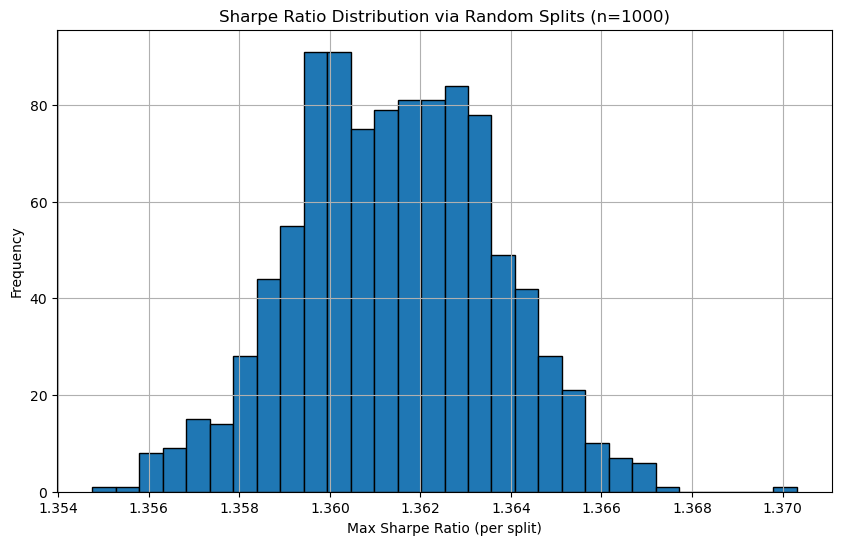

평균 Sharpe Ratio: 1.3614
최대 Sharpe Ratio: 1.3703
최소 Sharpe Ratio: 1.3547
중앙값 Sharpe Ratio: 1.3614
표준편차 Sharpe Ratio: 0.0022


In [32]:
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

N_BOOTSTRAP = 1000
thresholds = np.linspace(0.01, 0.99, 100)

def calc_max_sharpe(seed):
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)
    X_tr = X_tr.copy()
    X_val = X_val.copy()
    # treasury 컬럼을 risk_free 이자율로 반영
    X_tr['risk_free'] = X_tr['treasury']
    X_val['risk_free'] = X_val['treasury']

    lpm = LinearRegression()
    lpm.fit(X_tr.drop(columns='risk_free'), y_tr)
    val_pred_prob = lpm.predict(X_val.drop(columns='risk_free'))

    n_val = len(X_val)
    n_thresh = len(thresholds)
    val_pred_matrix = val_pred_prob.reshape(-1, 1)
    val_binary_mat = (val_pred_matrix > thresholds.reshape(1, -1)).astype(int)

    y_val_mat = np.array(y_val).reshape(-1, 1)
    int_rate_mat = np.array(X_val['int_rate']).reshape(-1, 1)
    risk_free_mat = np.array(X_val['risk_free']).reshape(-1, 1)

    y_val_mat = np.tile(y_val_mat, (1, n_thresh))
    int_rate_mat = np.tile(int_rate_mat, (1, n_thresh))
    risk_free_mat = np.tile(risk_free_mat, (1, n_thresh))

    cond_lend = (val_binary_mat == 0)
    cond_good = (y_val_mat == 0)
    good_lend = cond_lend & cond_good
    bad_lend = cond_lend & ~cond_good
    not_lend = (val_binary_mat == 1)

    val_return_mat = np.zeros_like(val_binary_mat, dtype=float)
    val_return_mat[good_lend] = int_rate_mat[good_lend]
    val_return_mat[bad_lend] = 0
    val_return_mat[not_lend] = risk_free_mat[not_lend]

    excess_ret_mat = val_return_mat - risk_free_mat
    means = np.mean(excess_ret_mat, axis=0)
    stds = np.std(excess_ret_mat, axis=0)
    sharpe_ratios = np.where(stds > 0, means / stds, np.nan)

    max_sharpe = np.nanmax(sharpe_ratios)
    return max_sharpe

# 병렬 실행 (n_jobs=6 또는 -1 등 적절히 설정)
sharpe_dist = Parallel(n_jobs=7)(delayed(calc_max_sharpe)(seed) for seed in range(N_BOOTSTRAP))

# 이후 시각화 및 통계 출력 (기존과 동일)
plt.figure(figsize=(10,6))
plt.hist(sharpe_dist, bins=30, edgecolor='k', alpha=1)
plt.xlabel("Max Sharpe Ratio (per split)")
plt.ylabel("Frequency")
plt.title("Sharpe Ratio Distribution via Random Splits (n=1000)")
plt.grid(True)
plt.show()

print(f"평균 Sharpe Ratio: {np.nanmean(sharpe_dist):.4f}")
print(f"최대 Sharpe Ratio: {np.nanmax(sharpe_dist):.4f}")
print(f"최소 Sharpe Ratio: {np.nanmin(sharpe_dist):.4f}")
print(f"중앙값 Sharpe Ratio: {np.nanmedian(sharpe_dist):.4f}")
print(f"표준편차 Sharpe Ratio: {np.nanstd(sharpe_dist):.4f}")


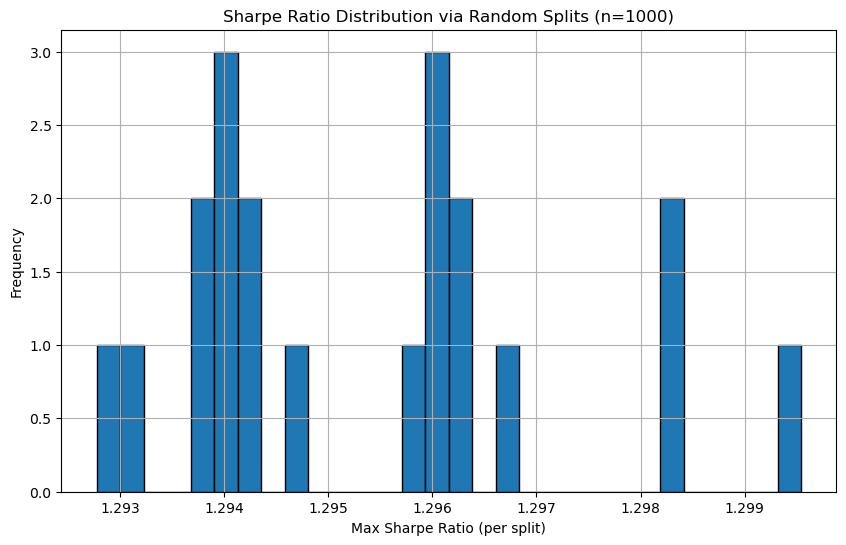

평균 Sharpe Ratio: 1.2954
최대 Sharpe Ratio: 1.2995
최소 Sharpe Ratio: 1.2928
중앙값 Sharpe Ratio: 1.2953
표준편차 Sharpe Ratio: 0.0018


In [45]:
# 벡터화 방식 샤프레이시오 부트스트레핑 (위의 병렬화 방식과 결과는 동일)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

N_BOOTSTRAP = 20
sharpe_dist = []
thresholds = np.linspace(0.01, 0.99, 100)

for seed in range(N_BOOTSTRAP):
    # 3:1 split, random_state만 다르게!
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)
    
    X_tr = X_tr.copy()
    X_val = X_val.copy()
    X_tr['risk_free'] = 3
    X_val['risk_free'] = 3

    lpm = LinearRegression()
    lpm.fit(X_tr.drop(columns='risk_free'), y_tr)
    val_pred_prob = lpm.predict(X_val.drop(columns='risk_free'))  # (n_val, )

    # ==== [ 벡터화 구간 ] ====
    n_val = len(X_val)
    n_thresh = len(thresholds)
    # (n_val, 1)
    val_pred_matrix = val_pred_prob.reshape(-1, 1)
    val_binary_mat = (val_pred_matrix > thresholds.reshape(1, -1)).astype(int)  # (n_val, n_thresh)

    # (n_val, 1) → (n_val, n_thresh)로 확장
    y_val_mat = np.array(y_val).reshape(-1, 1)
    int_rate_mat = np.array(X_val['int_rate']).reshape(-1, 1)
    risk_free_mat = np.array(X_val['risk_free']).reshape(-1, 1)

    y_val_mat = np.tile(y_val_mat, (1, n_thresh))
    int_rate_mat = np.tile(int_rate_mat, (1, n_thresh))
    risk_free_mat = np.tile(risk_free_mat, (1, n_thresh))

    cond_lend = (val_binary_mat == 0)
    cond_good = (y_val_mat == 0)
    good_lend = cond_lend & cond_good
    bad_lend = cond_lend & ~cond_good
    not_lend = (val_binary_mat == 1)

    val_return_mat = np.zeros_like(val_binary_mat, dtype=float)
    val_return_mat[good_lend] = int_rate_mat[good_lend]
    val_return_mat[bad_lend] = 0
    val_return_mat[not_lend] = risk_free_mat[not_lend]

    excess_ret_mat = val_return_mat - risk_free_mat
    means = np.mean(excess_ret_mat, axis=0)
    stds = np.std(excess_ret_mat, axis=0)
    sharpe_ratios = np.where(stds > 0, means / stds, np.nan)

    # max Sharpe만 저장
    max_sharpe = np.nanmax(sharpe_ratios)
    sharpe_dist.append(max_sharpe)

# 히스토그램 시각화
plt.figure(figsize=(10,6))
plt.hist(sharpe_dist, bins=30, edgecolor='k', alpha=1)
plt.xlabel("Max Sharpe Ratio (per split)")
plt.ylabel("Frequency")
plt.title("Sharpe Ratio Distribution via Random Splits (n=1000)")
plt.grid(True)
plt.show()

# 통계값 출력
print(f"평균 Sharpe Ratio: {np.nanmean(sharpe_dist):.4f}")
print(f"최대 Sharpe Ratio: {np.nanmax(sharpe_dist):.4f}")
print(f"최소 Sharpe Ratio: {np.nanmin(sharpe_dist):.4f}")
print(f"중앙값 Sharpe Ratio: {np.nanmedian(sharpe_dist):.4f}")
print(f"표준편차 Sharpe Ratio: {np.nanstd(sharpe_dist):.4f}")
